In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set()
# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [5]:
df = pd.read_csv('training.csv',sep=',')
df.head()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT


## Explore data
### Topic Frequency Plot

Text(0.5, 1.0, 'News Topic Distribution')

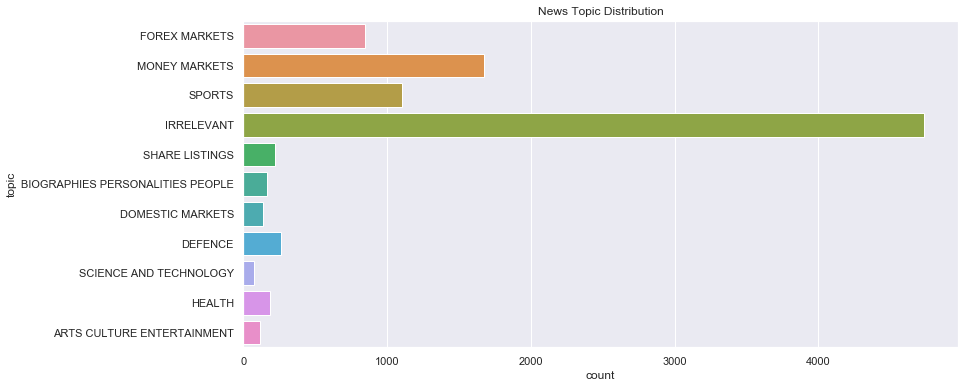

In [61]:
plt.figure(figsize=(12.8,6))
sns.countplot(y=df['topic']).set_title('News Topic Distribution')

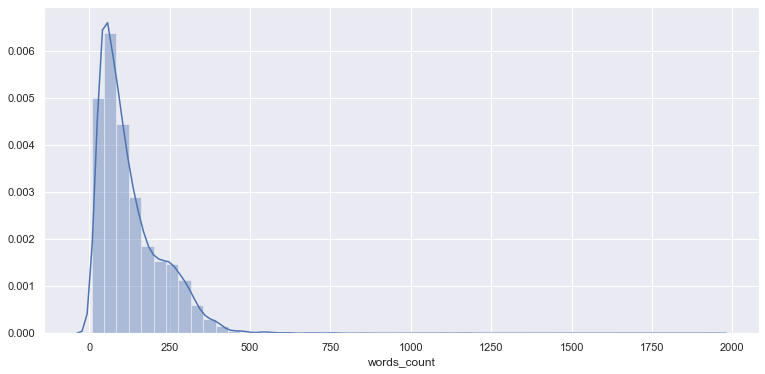

In [52]:
df['words_count'] = df['article_words'].str.split(',').str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(df['words_count']).set_title('Word count distribution')

In [53]:
df['words_count'].describe()

count    9500.000000
mean      127.706947
std        98.752819
min         8.000000
25%        54.000000
50%        97.000000
75%       176.000000
max      1935.000000
Name: words_count, dtype: float64

Let's remove from the 95% percentile onwards to better appreciate the histogram

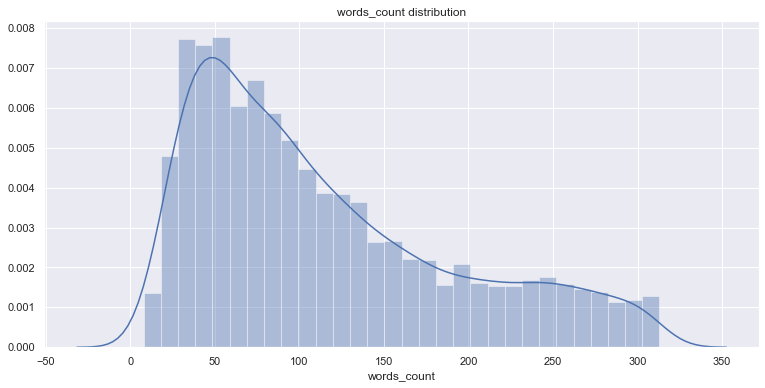

In [58]:
quantile_95 = df['words_count'].quantile(0.95)
df_95 = df[df['words_count'] < quantile_95]
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['words_count']).set_title('words_count distribution');

In [55]:
df_95.shape

(9024, 4)

plt.figure(figsize=(12.8,6))
sns.countplot(y=df['topic']).set_title('News Topic Distribution')

Text(0.5, 1.0, 'News Topic Distribution RELEVANT')

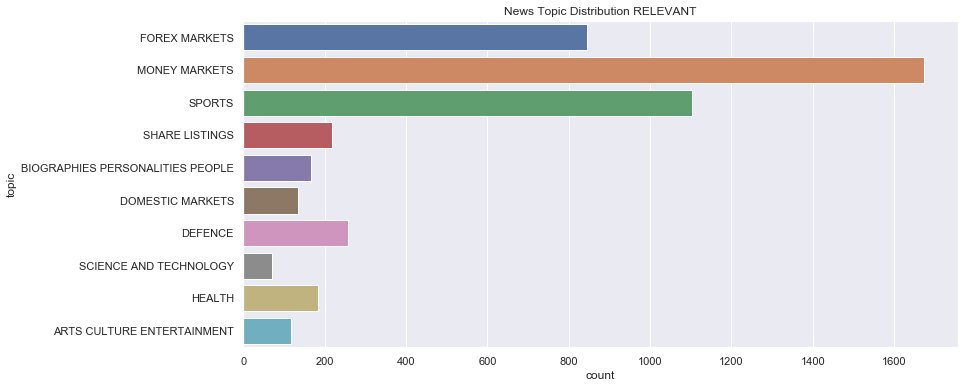

In [65]:
df1 = df[df.topic != 'IRRELEVANT']
plt.figure(figsize=(12.8,6))
sns.countplot(y=df1['topic']).set_title('News Topic Distribution RELEVANT')

In [66]:
df1.head()

,article_number,article_words,topic,words_count
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS,84
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS,61
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS,59
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS,67
5,6,"regist,equal,stock,stock,city,city,period,issu...",SHARE LISTINGS,67


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')
X = vectorizer.fit_transform(df1.iloc[:,1])

In [76]:
print(vectorizer.get_feature_names())

['_____', '______', '_______', '____________', '_bret', 'a1', 'a1b1', 'a2', 'a7', 'a78', 'aa', 'aahp', 'aalborg', 'aalst', 'aalton', 'aaltonaa', 'aamir', 'aamodt', 'aandewiel', 'aaqib', 'aaquib', 'aardvark', 'aargau', 'aarhus', 'aaron', 'aarts', 'aash', 'ab', 'abab', 'abach', 'aback', 'abandon', 'abat', 'abattoir', 'abax', 'abay', 'abb', 'abba', 'abbey', 'abbot', 'abbrev', 'abc', 'abciximab', 'abcl', 'abcp', 'abdal', 'abdel', 'abdelwahhab', 'abderdeen', 'abderrahim', 'abdicat', 'abdom', 'abdomin', 'abduc', 'abdul', 'abdull', 'abdullah', 'abdur', 'abe', 'abed', 'abedin', 'abeijon', 'abel', 'abelard', 'aberdeen', 'aberneth', 'aberystwyth', 'abet', 'abhor', 'abi', 'abid', 'abidj', 'abigail', 'abil', 'abioudun', 'ablet', 'ably', 'abm', 'abn', 'abnorm', 'aboard', 'abod', 'abol', 'abolut', 'abomin', 'aborigin', 'abort', 'abot', 'abou', 'abound', 'abraham', 'abras', 'abrie', 'abroad', 'abrupt', 'abruzz', 'absa', 'abscess', 'absens', 'absent', 'absolf', 'absolut', 'absorb', 'abstain', 'abstin'

In [79]:
X.shape

(4766, 24038)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X,df1.iloc[:,2])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [83]:
clf.predict(X[2])

array(['SPORTS'], dtype=object)

In [82]:
df1.head()

,article_number,article_words,topic,words_count
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS,84
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS,61
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS,59
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS,67
5,6,"regist,equal,stock,stock,city,city,period,issu...",SHARE LISTINGS,67


In [84]:
clf.score(X,df1.iloc[:,2])

0.9569869911875787

In [85]:
df_test = pd.read_csv('test.csv',sep=',')
df_test_re = df_test[df_test.topic != 'IRRELEVANT']

In [86]:
df_test_re.head()

,article_number,article_words,topic
2,9503,"heavy,heavy,gabriel,morn,morn,equit,cent,cent,...",FOREX MARKETS
5,9506,"option,cent,cent,cent,narongchai,narongchai,re...",FOREX MARKETS
7,9508,"open,open,open,open,open,open,nick,world,ameri...",SPORTS
12,9513,"world,world,nazarovi,medal,medal,end,braun,bra...",SPORTS
15,9516,"ist,rate,rate,rate,rate,rate,contribut,blu,dep...",MONEY MARKETS


In [87]:
X_test = vectorizer.transform(df_test_re['article_words'])

In [88]:
clf.score(X_test,df_test_re['topic'])

0.7094017094017094

Text(0.5, 1.0, 'News Topic Distribution')

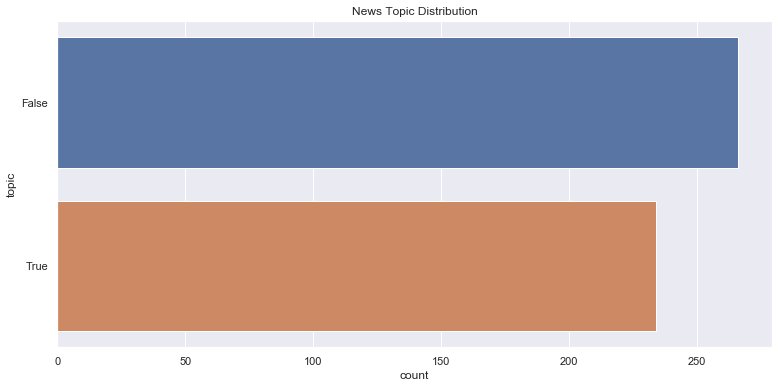

In [90]:
plt.figure(figsize=(12.8,6))
sns.countplot(y=df_test['topic'] != 'IRRELEVANT').set_title('News Topic Distribution')

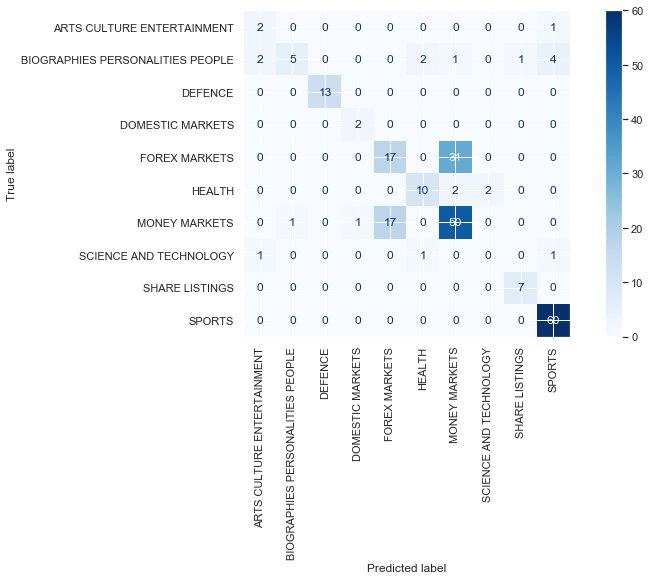

In [101]:
from sklearn.metrics import plot_confusion_matrix
fig, ax=plt.subplots(figsize=(12.8,6))
plot_confusion_matrix(clf,X_test,df_test_re['topic'],cmap=plt.cm.Blues,ax=ax, xticks_rotation=90)
plt.show()